## Chapter 1.5: Creating models from scratch
***
So far we have shown the basics to create geological models by importing data from an external source (in especial GeoModeller 3D). In this chapter, we will explore the option available in GemPy to create the data directly in GemPy or to modify existing one. In this respect we will delve into the pandas DataFrames that contain the necessary data.

Let's start as always by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
#%matplotlib inline


# Aux imports
import numpy as np
import pandas as pn
import matplotlib.pyplot as plt
import theano
import qgrid

#%matplotlib widget


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
#gp.save_model(geo_model)

In [3]:
if False:
    geo_model = gp.load_model('CreateModelTuto5.pickle')
else:
    geo_model = gp.create_model('CreateModelTuto5')
    gp.init_data(geo_model, [0, 1000, 0, 1000, -1000, 0], [50, 50, 50])
    geo_model.set_default_surfaces()
    geo_model.add_surface_points(400, 300, -500, 'surface1')
    geo_model.add_surface_points(600, 300, -500, 'surface1')
    geo_model.set_default_orientation()

- check pickle works
- when we set an is fault change the BottomRelation

In [4]:
#geo_model.set_default_surfaces()


Some default values but to make the model a bit faster but they are not necessary:

In [5]:
# #geo_model.add_formations(['surface1', 'basement'])
# geo_model.set_default_formations()
# geo_model.add_interfaces(400, 300, -500, 'surface1')
# geo_model.add_interfaces(600, 300, -500, 'surface1')
# #geo_model.set_default_orientation()

In [6]:
gp.set_interpolation_data(geo_model,  verbose=[])

Compiling theano function...
Compilation Done!


,values
dtype,float64
output,geology
theano_optimizer,fast_compile
device,cpu
verbosity,[]


In [7]:
geo_model.surface_points

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series
0,400.0,300.0,-500.0,0.583433,0.6251,0.291767,surface1,Default series,1.0,1.0
1,600.0,300.0,-500.0,0.750100,0.6251,0.291767,surface1,Default series,1.0,1.0


In [8]:
geo_model.additional_data

values
Structure isLith                                                        True
          isFault                                                      False
          number faults                                                    0
          number surfaces                                                  1
          number series                                                    1
          number surfaces per series                                     [1]
          len surfaces surface_points                                    [2]
          len series surface_points                                      [2]
          len series orientations                                        [1]
Options   dtype                                                      float64
          output                                                     geology
          theano_optimizer                                      fast_compile
          device                                                         cpu
          verbosity                                                       []
Kriging   range                                                      1732.05
          $C_o$                                                      71428.6
          drift equations                                                [3]
          nugget grad                                                   0.01
          nugget scalar                                                1e-06
Rescaling rescaling factor                                              1200
          centers                      [300.000005, 150.000005, -249.999995]

In [9]:
geo_model.interpolator.theano_graph.scalar_fields_matrix.get_value().shape

(1, 125002)

In [10]:
geo_model.interpolator.print_theano_shared()

len sereies i [0 1]
len sereies o [0 1]
len sereies w [0 7]
n surfaces per series [0 1]
n universal eq [3]
is finite [0]
is erosion [0]
is onlap [0]


In [20]:
geo_model.interpolator.set_initial_results()

In [25]:
gp.compute_model(geo_model)


Lithology ids 
  [3. 3. 3. ... 1. 1. 1.] 

In [26]:
geo_model.solutions.set_model_order()

,surface,series,order_surfaces,isBasement,color,id
1,surface2,Default series,1,False,#9f0052,1
0,surface1,Default series,2,False,#015482,2
2,surface3,Default series,3,True,#ffbe00,3


In [27]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
1,surface2,Default series,1,False,#9f0052,1
0,surface1,Default series,2,False,#015482,2
2,surface3,Default series,3,True,#ffbe00,3


../../gempy/plot/visualization_2d.py:287: FutureWarning: Passing the block directly will get deprecated in the next version. Please use Solutionand block_type instead
  'and block_type instead', FutureWarning)


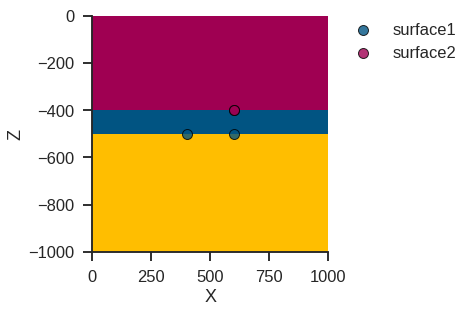

In [28]:
gp.plot.plot_section(geo_model, cell_number=25, block_type=geo_model.solutions.lith_block,
                         direction='y', plot_data=True)

In [17]:
vtk_object = gp.plot.plot_data_3D(geo_model)

closing vtk


In [18]:
#vtk_object.set_surface_points()

In [16]:
gp.activate_interactive_df(geo_model)

It is important to get df with get to update the models sinde the `activate_interactive` method is called

In [17]:
geo_model.qi.get('orientations')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [18]:
geo_model.qi.get('surface_points')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [22]:
break

SyntaxError: 'break' outside loop (cell_name, line 4)

In [19]:
geo_model.qi.get('surfaces')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [ ]:
geo_model.qi.get('series')

In [ ]:
geo_model.series

In [ ]:
geo_model.faults

In [ ]:
geo_model.qi.get('faults')

In [ ]:
geo_model.qi.get('faults_relations')

In [ ]:
geo_model.additional_data

In [ ]:
geo_model.additional_data.update_structure()

In [ ]:
geo_model.update_to_interpolator()

In [ ]:
geo_model.interpolator.print_theano_shared()

In [ ]:
geo_model.interpolator.additional_data.structure_data.df.loc['values', 'len series orientations']

In [ ]:
geo_model.interpolator.reset_flow_control()

In [ ]:
geo_model.interpolator.theano_graph.mask_matrix.get_value()

In [ ]:
geo_model.interpolator.theano_graph.is_onlap.set_value([0])
geo_model.interpolator.theano_graph.is_erosion.set_value([0])

In [ ]:
geo_model.interpolator.theano_graph.is_fault.get_value()

In [ ]:
#geo_model.update_to_interpolator()
gp.compute_model(geo_model, compute_mesh=False)

In [ ]:
gp.plot.plot_section(geo_model, cell_number=25, block_type=geo_model.solutions.block_matrix[0],
                         direction='y', plot_data=True)


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(geo_model.solutions.mask_matrix.reshape(50,50,50)[:,25,:].T, origin='bottom')

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(geo_model.solutions.lith_block.reshape(50,50,50)[:,25,:].T, origin='bottom')

In [ ]:
gp.compute_model(geo_model, compute_mesh=False)
gp.plot.plot_section(geo_model, cell_number=25, block_type=geo_model.solutions.lith_block,
                         direction='y', plot_data=True)

In [ ]:
gp.plot.plot_section(geo_model, 15, plot_data=True)

In [ ]:
gp.plot.plot_scalar_field(geo_model, 25, series=0)

In [ ]:
geo_model.series

In [ ]:
geo_model.solutions.block_matrix

In [ ]:
geo_model.solutions.scalar_field_at_interfaces.sum(axis=0)

In [ ]:
geo_model.additional_data.structure_data.df